<a href="https://colab.research.google.com/github/nuramrina46/SkripsiVGG19/blob/main/SkripsiVGG19/Learning%20rate/0.001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

 PNEUMONIA/                        pneumonia_vgg_19.ipynb
 PNEUMONIA32/                     'Salinan dari pneumonia_VGG_16_fiX (3).ipynb'
'pneumonia(clahe).ipynb'           Untitled0.ipynb
'pneumonia_VGG_16_fiX (3).ipynb'


In [4]:
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from matplotlib import pyplot as plt
from imutils import paths
import numpy as np
import os
import cv2

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("PNEUMONIA")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePaths in imagePaths:
    a = Image.open(imagePaths)
    image = np.array(a.resize((64,64))) / 255.0
    data.append(image)
    
    label = imagePaths.split(os.path.sep) [-2]
    labels.append(label)

In [7]:
temp = np.array(data)
temp = np.expand_dims(temp, axis=3)
print(temp.shape)

(3166, 64, 64, 1)


In [8]:
 from sklearn.preprocessing import LabelBinarizer
import numpy as np

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, label):
      nilaiy = super().transform(label)
      if self.y_type_== 'binary':
        return np.hstack((nilaiy, 1-nilaiy))
      else:
        return nilaiy
    def inverse_transform(self, nilaiy, threshold=None):
      if self.y_type_ == 'binary':
          return super().inverse_transform(nilaiy[:, 0], threshold)
      else:
          return super().inverse_transform(nilaiy, threshold)

lb = MyLabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [9]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.20, random_state=100)
print(trainX.shape)
print(testX.shape)

(2532, 64, 64)
(634, 64, 64)


In [10]:
def vgg19(num_classes):

    vgg19 = Sequential()

    #BLOCK1
    #layer1 32*32*64
    vgg19.add(Convolution2D(input_shape=(64,64,1),filters=64,kernel_size=(3,3),padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer2 16*16*64
    vgg19.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK2
    #layer3 16*16*128
    vgg19.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer4 8*8*128
    vgg19.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same",))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK3
    #layer5 8*8*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer6 8*8*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer7 8*8*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer8 4*4*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK4
    #layer8 4*4*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer9 4*4*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer10 4*4*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer11 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK5
    #layer11 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer12 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))  
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())    
    #layer13 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))  
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())    
    #layer13 1*1*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    # seventh block (classifier)
    #layer14 4096
    vgg19.add(Flatten())
    vgg19.add(Dense(units=4096))
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())
    vgg19.add(Dropout(0.5))
    #layer15 4096
    vgg19.add(Dense(units=4096))
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())
    vgg19.add(Dropout(0.5))
    #layer16 1000
    vgg19.add(Dense(units=1000))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    vgg19.add(Dropout(0.5)) 

    vgg19.add(Dense(2, activation="softmax"))

    return vgg19

In [11]:
num_classes=2
vgg19=vgg19(num_classes)
vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                      

In [12]:
#setting hyperparameter, menggunakan Adam
opt = RMSprop(lr=0.001)
vgg19.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                 
 activation_17 (Activation)  (None, 4096)              0         
                                                                 
 batch_normalization_17 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              4097000   
                                                                 
 activation_18 (Activation)  (None, 1000)              0         
                                                                 
 batch_normalization_18 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_2

In [13]:
#training data
H = vgg19.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=16)

Epoch 1/30
159/159 [==============================] - 21s 87ms/step - loss: 1.3184 - accuracy: 0.6058 - val_loss: 5717.7881 - val_accuracy: 0.4858
Epoch 2/30
159/159 [==============================] - 11s 67ms/step - loss: 0.6896 - accuracy: 0.7101 - val_loss: 2.1622 - val_accuracy: 0.4858
Epoch 3/30
159/159 [==============================] - 11s 68ms/step - loss: 0.5208 - accuracy: 0.7824 - val_loss: 123.6163 - val_accuracy: 0.4858
Epoch 4/30
159/159 [==============================] - 11s 68ms/step - loss: 0.4992 - accuracy: 0.7895 - val_loss: 14.8686 - val_accuracy: 0.4858
Epoch 5/30
159/159 [==============================] - 11s 69ms/step - loss: 0.3561 - accuracy: 0.8547 - val_loss: 0.8645 - val_accuracy: 0.7666
Epoch 6/30
159/159 [==============================] - 11s 68ms/step - loss: 0.3053 - accuracy: 0.8697 - val_loss: 0.9272 - val_accuracy: 0.8155
Epoch 7/30
159/159 [==============================] - 11s 70ms/step - loss: 0.2959 - accuracy: 0.8768 - val_loss: 3.7109 - val_acc

In [14]:
print("[INFO] evaluating network...")
predictions = vgg19.predict(testX, batch_size=16)
pred=predictions.argmax(axis=1)
testY_argm=testY.argmax(axis=1)


[INFO] evaluating network...


In [15]:
print(classification_report(testY_argm,pred,target_names=lb.classes_))

              precision    recall  f1-score   support

      Normal       0.89      0.98      0.93       308
   Pneumonia       0.98      0.88      0.93       326

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



In [16]:
test_score = vgg19.evaluate(testX, testY) 
print("Test Loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

20/20 [==============================] - 2s 56ms/step - loss: 0.1979 - accuracy: 0.9290
Test Loss 0.1979, accuracy 92.90%


In [17]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap='Blues'):
  if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
  else:
     print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

Normalized confusion matrix
[[0.98 0.02]
 [0.12 0.88]]


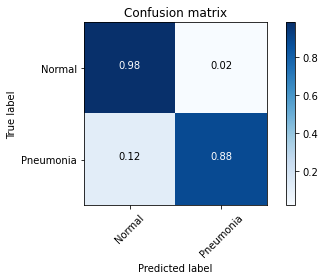

Confusion matrix, without normalization
[[302   6]
 [ 39 287]]


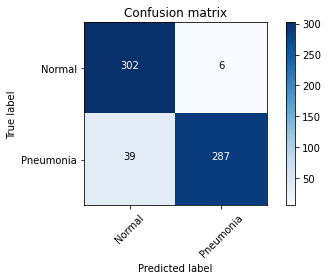

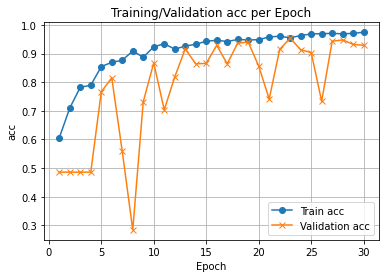

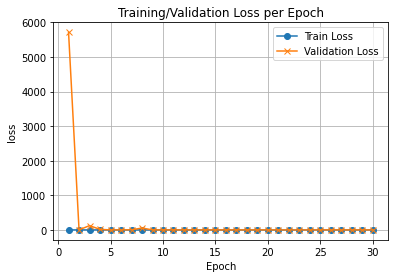

In [18]:
cnf_matrix = confusion_matrix(testY_argm, pred)
np.set_printoptions(precision=2)

# Plot non/normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=True)
plt.show()

plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=False)
plt.show()

f, ax = plt.subplots()
ax.plot([None] + H.history['accuracy'], 'o-')
ax.plot([None] + H.history['val_accuracy'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.grid(True)

f, ax = plt.subplots()
ax.plot([None] + H.history['loss'], 'o-')
ax.plot([None] + H.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
plt.grid(True)